<a href="https://colab.research.google.com/github/seongs/pytorch/blob/main/PYTORCH_%EC%86%8C%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Tensors

In [ ]:
import torch

In [ ]:
z = torch.zeros(5,3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


위에서, 0으로 채워진 5x3 행렬을 만들고, 파이토치의 기본 타입인, 0으로 채워진 32비트 부동소수점 데이터 타입인지 확인합니다.

만약 정수형 데이터 타입을 원한다면 기본값을 재정의할 수 있습니다:

In [ ]:
i = torch.ones((5,3), dtype = torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


dtype의 기본값을 변경하면 tensor가 출력될 때 데이터 타입을 확인할 수 있습니다.

학습 가중치를 무작위로 초기화하는 것이 일반적이며, 종종 결과의 재현성을 위해 PRNG에 대한 특정 시드로 초기화합니다.

In [ ]:
torch.manual_seed(1729)
r1 = torch.rand(2,2)
print("랜덤 tensor 값:")
print(r1)

r2 = torch.rand(2,2)
print('\n다른 랜덤 tensor 값:')
print(r2)

torch.manual_seed(1729)
r3 = torch.rand(2,2)
print('\nr1과 일치:')
print(r3)

랜덤 tensor 값:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

다른 랜덤 tensor 값:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

r1과 일치:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


PyTorch tensor는 산술 연산을 직관적으로 수행합니다. 유사한 shape의 tensor들이 더하거나 곱하거나 그 외 연산도 가능합니다. 스칼라를 사용한 연산은 tensor에 분산됩니다.

In [ ]:
ones = torch.ones(2,3)
print(ones)

twos = torch.ones(2,3) * 2
print(twos)

threes = ones + twos
print(threes)
print(threes.shape)

r1 = torch.rand(2,3)
r2 = torch.rand(3,2)

#r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


In [ ]:
r = (torch.rand(2,2) - 0.5) * 2
print('랜덤 행렬값, r:')
print(r)

print('\nr의 절대값')
print(torch.abs(r))

print('\nr의 역 사인 함수:')
print(torch.asin(r))

print('\nr의 행렬식:')
print(torch.det(r))
print('\nr의 특이값 분해:')
print(torch.svd(r))

print('\nr의 평균 및 표준편차:')
print(torch.std_mean(r))
print('\nr의 최대값')
print(torch.max(r))

랜덤 행렬값, r:
tensor([[ 0.9956, -0.2232],
        [ 0.3858, -0.6593]])

r의 절대값
tensor([[0.9956, 0.2232],
        [0.3858, 0.6593]])

r의 역 사인 함수:
tensor([[ 1.4775, -0.2251],
        [ 0.3961, -0.7199]])

r의 행렬식:
tensor(-0.5703)

r의 특이값 분해:
torch.return_types.svd(
U=tensor([[-0.8353, -0.5497],
        [-0.5497,  0.8353]]),
S=tensor([1.1793, 0.4836]),
V=tensor([[-0.8851, -0.4654],
        [ 0.4654, -0.8851]]))

r의 평균 및 표준편차:
(tensor(0.7217), tensor(0.1247))

r의 최대값
tensor(0.9956)


## PyTorch Models

PyTorch에서 Model을 표현할 수 있는 방법에 대해 알아보겠습니다.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

LeNet-5의 다이어그램은 초기 합성곱 신경망 중 하나이자 딥 러닝에서 폭발적인 인기를 일으킨 요인중 하나입니다. 손으로 쓴 숫자 이미지(MNIST 데이터셋)를 읽고 이미지에 어떤 숫자가 표현되었는지 정확하게 분류하기 위해 제작되었습니다.

LeNet-5가 어떻게 동작하는지에 대한 간단한 설명은 다음과 같습니다:

- 계층 C1은 합성곱 계층입니다. 즉, 입력 이미지에서 학습 중에 배웠던 특징을 검색합니다. 이미지에서 학습된 각 특징을 위치에 대한 출력 맵을 보여줍니다. 이 “활성화 맵” 으로 S2 계층에서 다운샘플링됩니다.

- 계층 C3는 다른 합성곱 계층으로, 이 시점은 특징들의 조합 을 위해 C1 활성화 맵 검색합니다. 또한, 계층 S4에서 다운샘플링된 이러한 특징 조합의 spatial locations을 제공합니다.

- 마지막으로, 완전 연결 계층(fully-connected layers)인 F5, F6, OUTPUT은 최종 활성화 맵을 가져와 십진수를 표현하는 10개의 bin 중 하나로 분류 하는 분류기입니다.

이 간단한 신경망을 코드로 어떻게 표현할 수 있을까요?

In [ ]:
class LeNet(nn.Module):

  def __init__(self):
    super(LeNet,self).__init__()
    self.conv1 = nn.Conv2d(1,6,5)
    self.conv2 = nn.Conv2d(6,16,5)

    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)),2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

코드를 살펴보면 구조적으로 위 다이어그램과 유사점을 발견할 수 있습니다.

다음은 일반적인 PyTorch 모델의 구조를 보여줍니다:

- 모듈은 중첩될 수 있으며 torch.nn.Module 에서 상속됩니다. - 실제로, Conv2d 와 Linear 계층 클래스도 torch.nn.Module 에서 상속됩니다.

- 모델은 계층을 인스턴스화하고 필요한 데이터 아티팩트를 로드하는 __init__() 함수를 가지고 있습니다. (예를들면 NLP 모델은 어휘를 불러올 수 있)

- 모델은 forward() 함수를 가지고 있다. 여기서 실제 계산이 수행됩니다. 입력은 네트워크 계층 및 다양한 기능들을 통과시켜 결과를 생성합니다.

- 그 외에는 다른 파이썬 클래스처럼 모델 클래스를 구성할 수 있습니다. Python 클래스, 모델의 계산을 지원하는 데 필요한 속성 및 메서드를 추가합니다.

자 이제 만든 오브젝트를 인스턴스화하고 샘플 입력을 통해 실행합니다.

In [ ]:
net = LeNet()
print(net)

input = torch.rand(1,1,32,32)
print('\n이미지 배치 shape:')
print(input.shape)

output = net(input)
print('\n: 결과값')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

이미지 배치 shape:
torch.Size([1, 1, 32, 32])

: 결과값
tensor([[ 0.0898,  0.0318,  0.1485,  0.0301, -0.0085, -0.1135, -0.0296,  0.0164,
          0.0039,  0.0616]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


위에서 몇가지 중요한 일들이 일어나고 있습니다.

첫째, LeNet 클래스를 인스턴스화하고 net 객체를 출력합니다. torch.nn.Module 의 하위 클래스는 생성된 레이어의 모양과 파라미터를 알려줍니다. 모델의 처리 결과를 얻으려는 경우, 모델의 편리한 기능을 제공할 수 있습니다.

아래에서 1 채널과 32x32 이미지크기를 가진 더미 입력을 생성합니다. 일반적으로 배치 이미지를읽어들이고,이미지와 같은 크기의 텐서로 변환합니다.

tensor 의 추가 차원인 batch 차원 을 알아챘을 수 있습니다. PyTorch 모델은 데이터의 batch 에 작업한다고 가정합니다. 예를들어 16개 이미지의 배치는 (1, 1, 32, 32) 모양을 가질 것입니다. 이 샘플에서는 하나의 이미지만 사용하기 때문에 (1, 1, 32, 32) 모양을 가진 batch를 만듭니다.

모델을 함수처럼 net(input) 를 호출하여 추론을 요청합니다: 호출의 결과는 입력 이미지가 특정 숫자를 나타내는 모델의 신뢰도를 나타냅니다. (모델의 인스턴스는 아직 아무것도 학습하지 않았기 때문에 출력에서 좋은 결과를 기대해서는 안 됩니다) output 결과를 확인해보면 batch 차원을 가지고 있다는 것을 알 수 있는데, 크기는 항상 입력 batch 차원과 일치해야 합니다. 만약 16개의 인스턴스로 이루어진 입력으로 모델을 통과했다면 output 는 (16, 10) 의 형태를 가지고 있습니다.

## Datasets 및 Dataloaders

아래 예제에서는 TorchVision에서 바로 다운로드할 수 있는 오픈 데이터셋 중 하나를 사용하여 모델을 통해 이미지를 변환하는 방법, DataLoader를 사용하여 모델에 데이터 배치를 제공하는 방법을 학습합니다.

첫 번째 할 일은 들어오는 이미지를 Pytorch tensor로 변환하는 것입니다.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

여기서는 입력에 대한 두 가지 변환을 지정합니다:

- ``transforms.ToTensor()``는 Pillow 패키지를 사용하여 불러온 이미지를 PyTorch tensor 형태로 변환합니다.

- transforms.Normalize() 는 tensor의 평균이 0이고 표준 편차가 0.5가
되도록 tensor의 값을 조정합니다. 대부분의 활성화 함수는 약 x=0에 강한 기울기 값을 가지고 있어 데이터를 중앙으로 집중화하여 학습 속도를 높일 수 있습니다.

transforms 는 cropping, centering, rotation, reflection를 포함하여 더 많은 변환이 가능합니다.

다음으로 CIFAR10 데이터셋의 인스턴스를 만듭니다. CIFAR10 데이터셋은 동물(새, 고양이, 사슴, 개, 개구리, 말) 6종과 차량(비행기, 자동차, 배, 트럭) 4종의 클래스로 이루어진 데이터셋입니다:

In [ ]:
trainset = torchvision.datasets.CIFAR10(
    root = './data', train=True, download=True, transform=transform
)

100%|██████████| 170498071/170498071 [00:03<00:00, 48635752.06it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


PyTorch에서 데이터셋 객체를 만드는 예제입니다. 다운로드 가능한 데이터셋 (CIFAR-10과 같은)는 torch.utils.data.Dataset 의 하위 클래스입니다. PyTorch의 Dataset 클래스에는 TorchVision, Torchtext 및 TorchAudio 등 다운로드 가능한 데이터셋 뿐 아니라 레이블된 이미지의 폴더를 읽는 torchvision.datasets.ImageFolder 와 같은 유틸리티 데이터셋 클래스가 포함됩니다. 또한, Dataset 의 하위 클래스를 직접 만들 수 있습니다.

데이터셋을 인스턴스화할 때 몇 가지 파라미터를 선언해야 합니다.

- 데이터를 저장하려는 파일 시스템 경로입니다.

- 데이터셋을 학습에 사용하는지 여부를 확인하여 대부분의 데이터셋은 학습 및 테스트 데이터셋으로 분할됩니다.

- 데이터셋을 다운로드할지에 대한 여부를 확인합니다.

- 데이터에 적용하려는 변환 객체를 넣어줍니다.

데이터셋 다운로드가 끝나면 ``DataLoader``에 사용할 수 있습니다:

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers =2 )

Dataset 하위 클래스는 데이터 접근에 대한 클래스를 포함하며, 해당 서브 클래스가 제공하는 데이터 유형에 특화되어 있습니다. DataLoader 는 데이터에 대해 아무것도 알지 못하지만 Dataset 이 제공하는 입력 tensor를 사용자가 지정한 파라미터로 구성합니다.

위 예제에서 DataLoader 에서에서 무작위 추출( shuffle=True )한 4개의 batch 이미지를 trainset 에서 추출하고 disk에서 데이터를 로드하기 위해 2개의 workers를 spin up 했습니다.

DataLoader 가 제공하는 batch 이미지를 시각화 하는것은 좋은 연습입니다:

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


 ship   car horse  ship


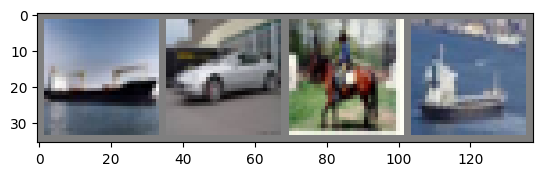

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird','cat','deer','dog','frog','horse','ship','truck')

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s'%classes[labels[j]] for j in range(4)))

## PyTorch 모델 학습

위에서 다뤘던 내용들을 종합하여 모델을 학습시키겠습니다

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  cat   cat  deer  frog


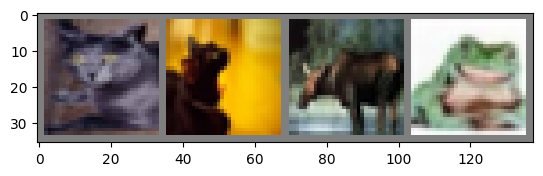

In [ ]:
def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 *5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

아래는 마지막으로 학습에 필요한 손실 함수 및 최적화 방법입니다.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

손실 함수(loss function)는 데이터 기반으로 모델이 예측한 정답 값이 얼마나 차이가 나는지를 표현하는 지표입니다. Cross-entropy 손실 함수는 일반적인 분류 모델의 전형적인 손실 함수입니다.

optimizer 는 학습의 필수요소입니다. 아래 예제에서 간단한 최적화 알고리즘인 stochastic gradient descent 를 구현하겠습니다. SGD 알고리즘은 학습 속도인 (lr) 및 momentum 과 같은 매개 변수 외에도 모델의 모든 학습 가중치 값인 net.parameters() 를 전달하는데, 이 함수는 최적화를 위해 파라미터를 조정합니다.

마지막으로, 모든 것이 학습 loop에 들어갑니다. 이제 아래 셀을 실행하세요. 실행 시 몇 분 정도 걸릴 수 있습니다:

In [ ]:
for epoch in range(2):

  running_loss = 0.0
  for i,data in enumerate(trainloader, 0):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print('{%d, %5d} loss: %.3f' %
            (epoch + 1, i + 1,running_loss / 2000))
      running_loss = 0.0

  print('Finished Training')


{1,  2000} loss: 2.205
{1,  4000} loss: 1.846
{1,  6000} loss: 1.675
{1,  8000} loss: 1.594
{1, 10000} loss: 1.523
{1, 12000} loss: 1.469
Finished Training
{2,  2000} loss: 1.423
{2,  4000} loss: 1.354
{2,  6000} loss: 1.347
{2,  8000} loss: 1.314
{2, 10000} loss: 1.293
{2, 12000} loss: 1.251
Finished Training


손실 값은 단조롭게 감소하며, 이는 모델이 훈련 데이터셋에서 성능을 계속 향상시키고 있음을 보여줍니다.

마지막 단계로 모델이 단순하게 학습 데이터셋을 “기억” 하는 것이 아니라 실제로 일반화 학습을 잘 수행하고 있는 확인해야 합니다. 이를 과적합 이라 부르며 일반적으로 데이터셋이 너무 작거나, 모델이 데이터셋 을 올바르게 모델링하는 데 필요한 것보다 더 많은 학습 파라미터 변수를 가지고 있음을 보여줍니다. (일반적인 학습에 충분한 예제가 아닙니다)

위와 같이 데이터셋이 학습 및 테스트 데이터셋으로 분할되는 이유입니다. 모델의 일반성을 테스트하기 위해 학습되지 않은 데이터에 대해 예측하도록 요청합니다:

In [ ]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)


Files already downloaded and verified


In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels =data
    outputs = net(images)
    _, predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('10000개 테스트 이미지에서 모델 정확도: %d %%'%(
    100 * correct / total
))

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


10000개 테스트 이미지에서 모델 정확도: 55 %
